In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Orlando Vargas,2005
1,Niu-Peng,1989
2,Anandabhadram,2005
3,Mahendra Varma,1993
4,Beomdiga shidae,1970


In [4]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Używając groupby(), wydrukuj liczbę filmów, które wyprodukowano w gażdej dekadzie w historii kina.

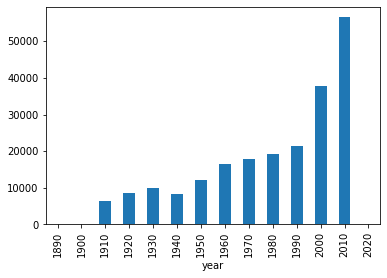

In [5]:
t = titles
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

### Użyj groupby() do wydrukowania liczby filmów "Hamlet" dla każdej dekady.

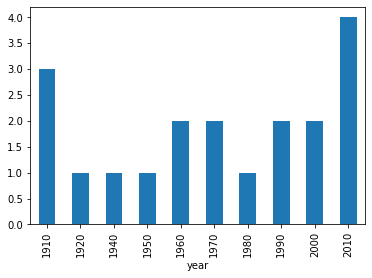

In [6]:
t = titles
t = t[t.title == 'Hamlet']
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

### Ile ról pierwszoplanowych (n=1) było dostępnych dla aktorów, a ile dla aktorek w każdym roku lat 50 tych? Użyj groupby().

In [7]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      604
      actress    270
1951  actor      632
      actress    272
1952  actor      591
      actress    286
1953  actor      631
      actress    290
1954  actor      623
      actress    298
1955  actor      606
      actress    264
1956  actor      611
      actress    288
1957  actor      707
      actress    283
1958  actor      692
      actress    275
1959  actor      678
      actress    287
dtype: int64

### Biorąc pod uwagę dekadę lat 50 tych jako całość, ile wszystkich ról było dostępnych dla aktorów i ile dla aktorek dla każdego 'n' mniejszego od 6?

In [8]:
c = cast
c = c[c.year // 10 * 10 == 1950]
c = c[c.n < 6]
c.groupby(['n', 'type']).size()

n    type   
1.0  actor      6375
     actress    2813
2.0  actor      4377
     actress    4399
3.0  actor      5404
     actress    3015
4.0  actor      5400
     actress    2742
5.0  actor      5428
     actress    2443
dtype: int64

### Użyj groupby() do określenia ile ról było w poszczególnych latach dla filmu Pink Panther.

In [10]:
c = cast
c = c[c.title == 'The Pink Panther']
c = c.sort_values('n').groupby(['year'])[['n']].max()
c

,n
year,
1963,15.0
2006,50.0


### Wylistuj, w porządku lat, każdy film, w którym Frank Oz grał więcej niż jedną rolę.

In [11]:
c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['year', 'title']).size()
g[g > 1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64

### Wylistuj każdą rolę, którą Frank Oz odtwarzał przynajmniej dwa razy.

In [13]:
c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['character']).size()
g[g > 1].sort_values()

character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Yoda              5
Animal            6
Miss Piggy        6
dtype: int64

## Koniec części 3